In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
def causRate(msOns, wbLock, waLock, nt):
    """

     analyse rate in causal time window

     input:    msOns   - microsaccade onset times
               wbLock  - window before lock
               waLock  - window after lock
               nt      - number of trials
    
     output:   rate    - microsaccade rate
               scale   - time axis
    
    12.12.2005 by Martin Rolfs
    21.06.2021 translated to python by Clara Kuper
    """
    
    # check how many trials these values came from
    if type(nt)==int:
        nt = np.linspace(nt,nt,len(np.arange(-wbLock,waLock, 1)));
    elif len(nt)!=len(np.arange(-wbLock,waLock, 1)):
        error('nt must have the same length as -wbLock:waLock!')

    # alpha defines how much the distribution is shifted
    alpha = 1/20;
    # define empty arrays for scale and rate
    scale = [];
    rate = [];
    
    # loop through all time windows
    for t in np.arange(-wbLock,waLock):
        
        # save the time
        scale.append(t)
        # compute tau
        tau = t-msOns+1/alpha
        # filter tau as event 0/1
        tau = tau[tau>0]
        # get the number of saccades in a given window
        causal = alpha**2*tau*np.exp(-alpha*tau)
        # save the rate 
        rate.append(sum(causal)*1000/nt[len(scale)-1])
    
    return rate, scale

In [4]:
def causweight(tau, alpha = 1/20):
    
    causal = alpha**2*tau*np.exp(-alpha*tau)
    
    return causal

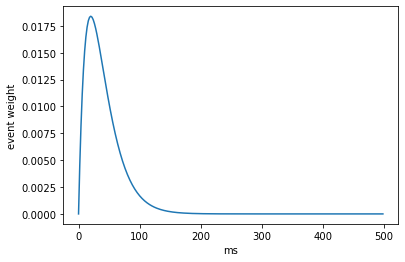

In [10]:
tau_array = []
for tau in np.arange(0,500,2):
    
    tau_array.append(causweight(tau))
    
plt.plot(np.arange(0,500,2), tau_array)

plt.xlabel('ms')
plt.ylabel('event weight')

plt.figsave('../figures/weightwindow.png')